In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
import json

In [3]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfpage import PDFTextExtractionNotAllowed
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import (
    LAParams,
    LTContainer,
    LTTextLine,
    LTFigure
)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.patches as patches

In [5]:
from pdf2image import convert_from_path, convert_from_bytes

In [6]:
import pdfminer.high_level

In [7]:
def extract_objects(layout, extracted_objects):
    """ extract text,image recursively """
    if not isinstance(layout, LTContainer):
        return
    
    for obj in layout:
        if isinstance(obj, LTTextLine):
            extracted_objects.append({
                    "type": "text",
                    "text": obj.get_text(),
                    "bbox": {
                        "x1": obj.bbox[0],
                        'x2': obj.bbox[1],
                        'y1': obj.bbox[2],
                        'y2': obj.bbox[3]
                    }
                })
            
            # recursive call
            
        elif isinstance(obj, LTFigure):
            extracted_objects.append({
                    "type": "image",
                    "bbox": {
                        "x1": obj.bbox[0],
                        'x2': obj.bbox[1],
                        'y1': obj.bbox[2],
                        'y2': obj.bbox[3]
                    }
                })
        extract_objects(obj, extracted_objects)

In [8]:
_p = []
def extract_pdf(pdf_file_path):
    extracted_page_data = []

    with open(path, "rb") as f:
        parser = PDFParser(f)
        document = PDFDocument(parser)
        if not document.is_extractable:
            raise PDFTextExtractionNotAllowed
        laparams = LAParams(all_texts=True)
        rsrcmgr = PDFResourceManager()
        device = PDFPageAggregator(rsrcmgr, laparams=laparams)
        interpreter = PDFPageInterpreter(rsrcmgr, device)

        pages = list(PDFPage.create_pages(document))

        for page_no, page in enumerate(pages):
            interpreter.process_page(page)
            layout = device.get_result()
            
            global _p
            _p.append(page)
            contents = []
            extract_objects(layout, contents)

            page_data = {
                "bbox": {
                    "x1": page.mediabox[0],
                    "x2": page.mediabox[2],
                    "y1": page.mediabox[1],
                    "y2": page.mediabox[3],
                },
                "contents": contents
            }
            extracted_page_data.append(page_data)   
    
    return extracted_page_data

In [9]:
type(pdf_images[0])

NameError: name 'pdf_images' is not defined

In [10]:
path = "./temp/f3894452-5c04-4623-b91c-10b7e70d07a2.pdf"
pages  = extract_pdf(path)
pdf_images = convert_from_path(path)

In [11]:
_p[0]

<PDFPage: Resources={'Font': {'F56': <PDFObjRef:205>, 'F59': <PDFObjRef:206>, 'F60': <PDFObjRef:207>}, 'ProcSet': [/'PDF', /'Text'], 'XObject': {'Im1': <PDFObjRef:92>}}, MediaBox=[0, 0, 612, 792]>

In [12]:
dir(_p[0])

['INHERITABLE_ATTRS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annots',
 'attrs',
 'beads',
 'contents',
 'create_pages',
 'cropbox',
 'doc',
 'get_pages',
 'lastmod',
 'mediabox',
 'pageid',
 'resources',
 'rotate']

In [13]:
def write_text(page):
    for content in page['contents']:
        
        if content['type'] == 'text':
            print(content['text'])
    print()

In [32]:
def plot_page(page, page_image):
    
    image_w, image_h = page_image.size
    pdf_w = page['bbox']['x2']- page['bbox']['x1']
    pdf_h = page['bbox']['y2']- page['bbox']['y1']
    
    w_scale = image_w/pdf_w
    h_scale = image_h/pdf_h
    
    # Plot Page
    fig = plt.figure()
    ax = plt.axes()
    
    for content_num, content in enumerate(page['contents']):
        
        if content_num != 65:
            continue
        print(content)
        
        bbox = content['bbox']
        content_w = (bbox['x2'] - bbox['x1'])*w_scale
        content_h = (bbox['y2'] - bbox['y1'])*h_scale
        # content_w = 50*w_scale
        # content_h = 50*h_scale
        
        if content['type'] == 'image':
            xy  = (bbox['x1']*w_scale, bbox['y1']*h_scale)
            r = patches.Rectangle(xy=xy, width=content_w,height=content_h, ec='#00FF00', fill=False, linestyle='solid', linewidth = 0.2)
            ax.add_patch(r)
        elif content['type'] == 'text':
            xy  = (bbox['x1']*w_scale, bbox['y1']*h_scale)
            r = patches.Rectangle(xy=xy, width=content_w,height=content_h, ec='#FF0000', fill=False, linestyle='solid', linewidth = 0.1)
            ax.add_patch(r)

    ax.set_xlim(0,image_w)
    ax.set_ylim(0,image_h)

    ax.set_aspect('equal')
    
    plt.imshow(np.flipud(page_image))
    # plt.gca().invert_yaxis()

    plt.show()

{'type': 'text', 'text': 'of sharing fever information, the message to be notiﬁed must\n', 'bbox': {'x1': 311.978, 'x2': 228.66207840000004, 'y1': 563.0355200000001, 'y2': 238.62467840000005}}


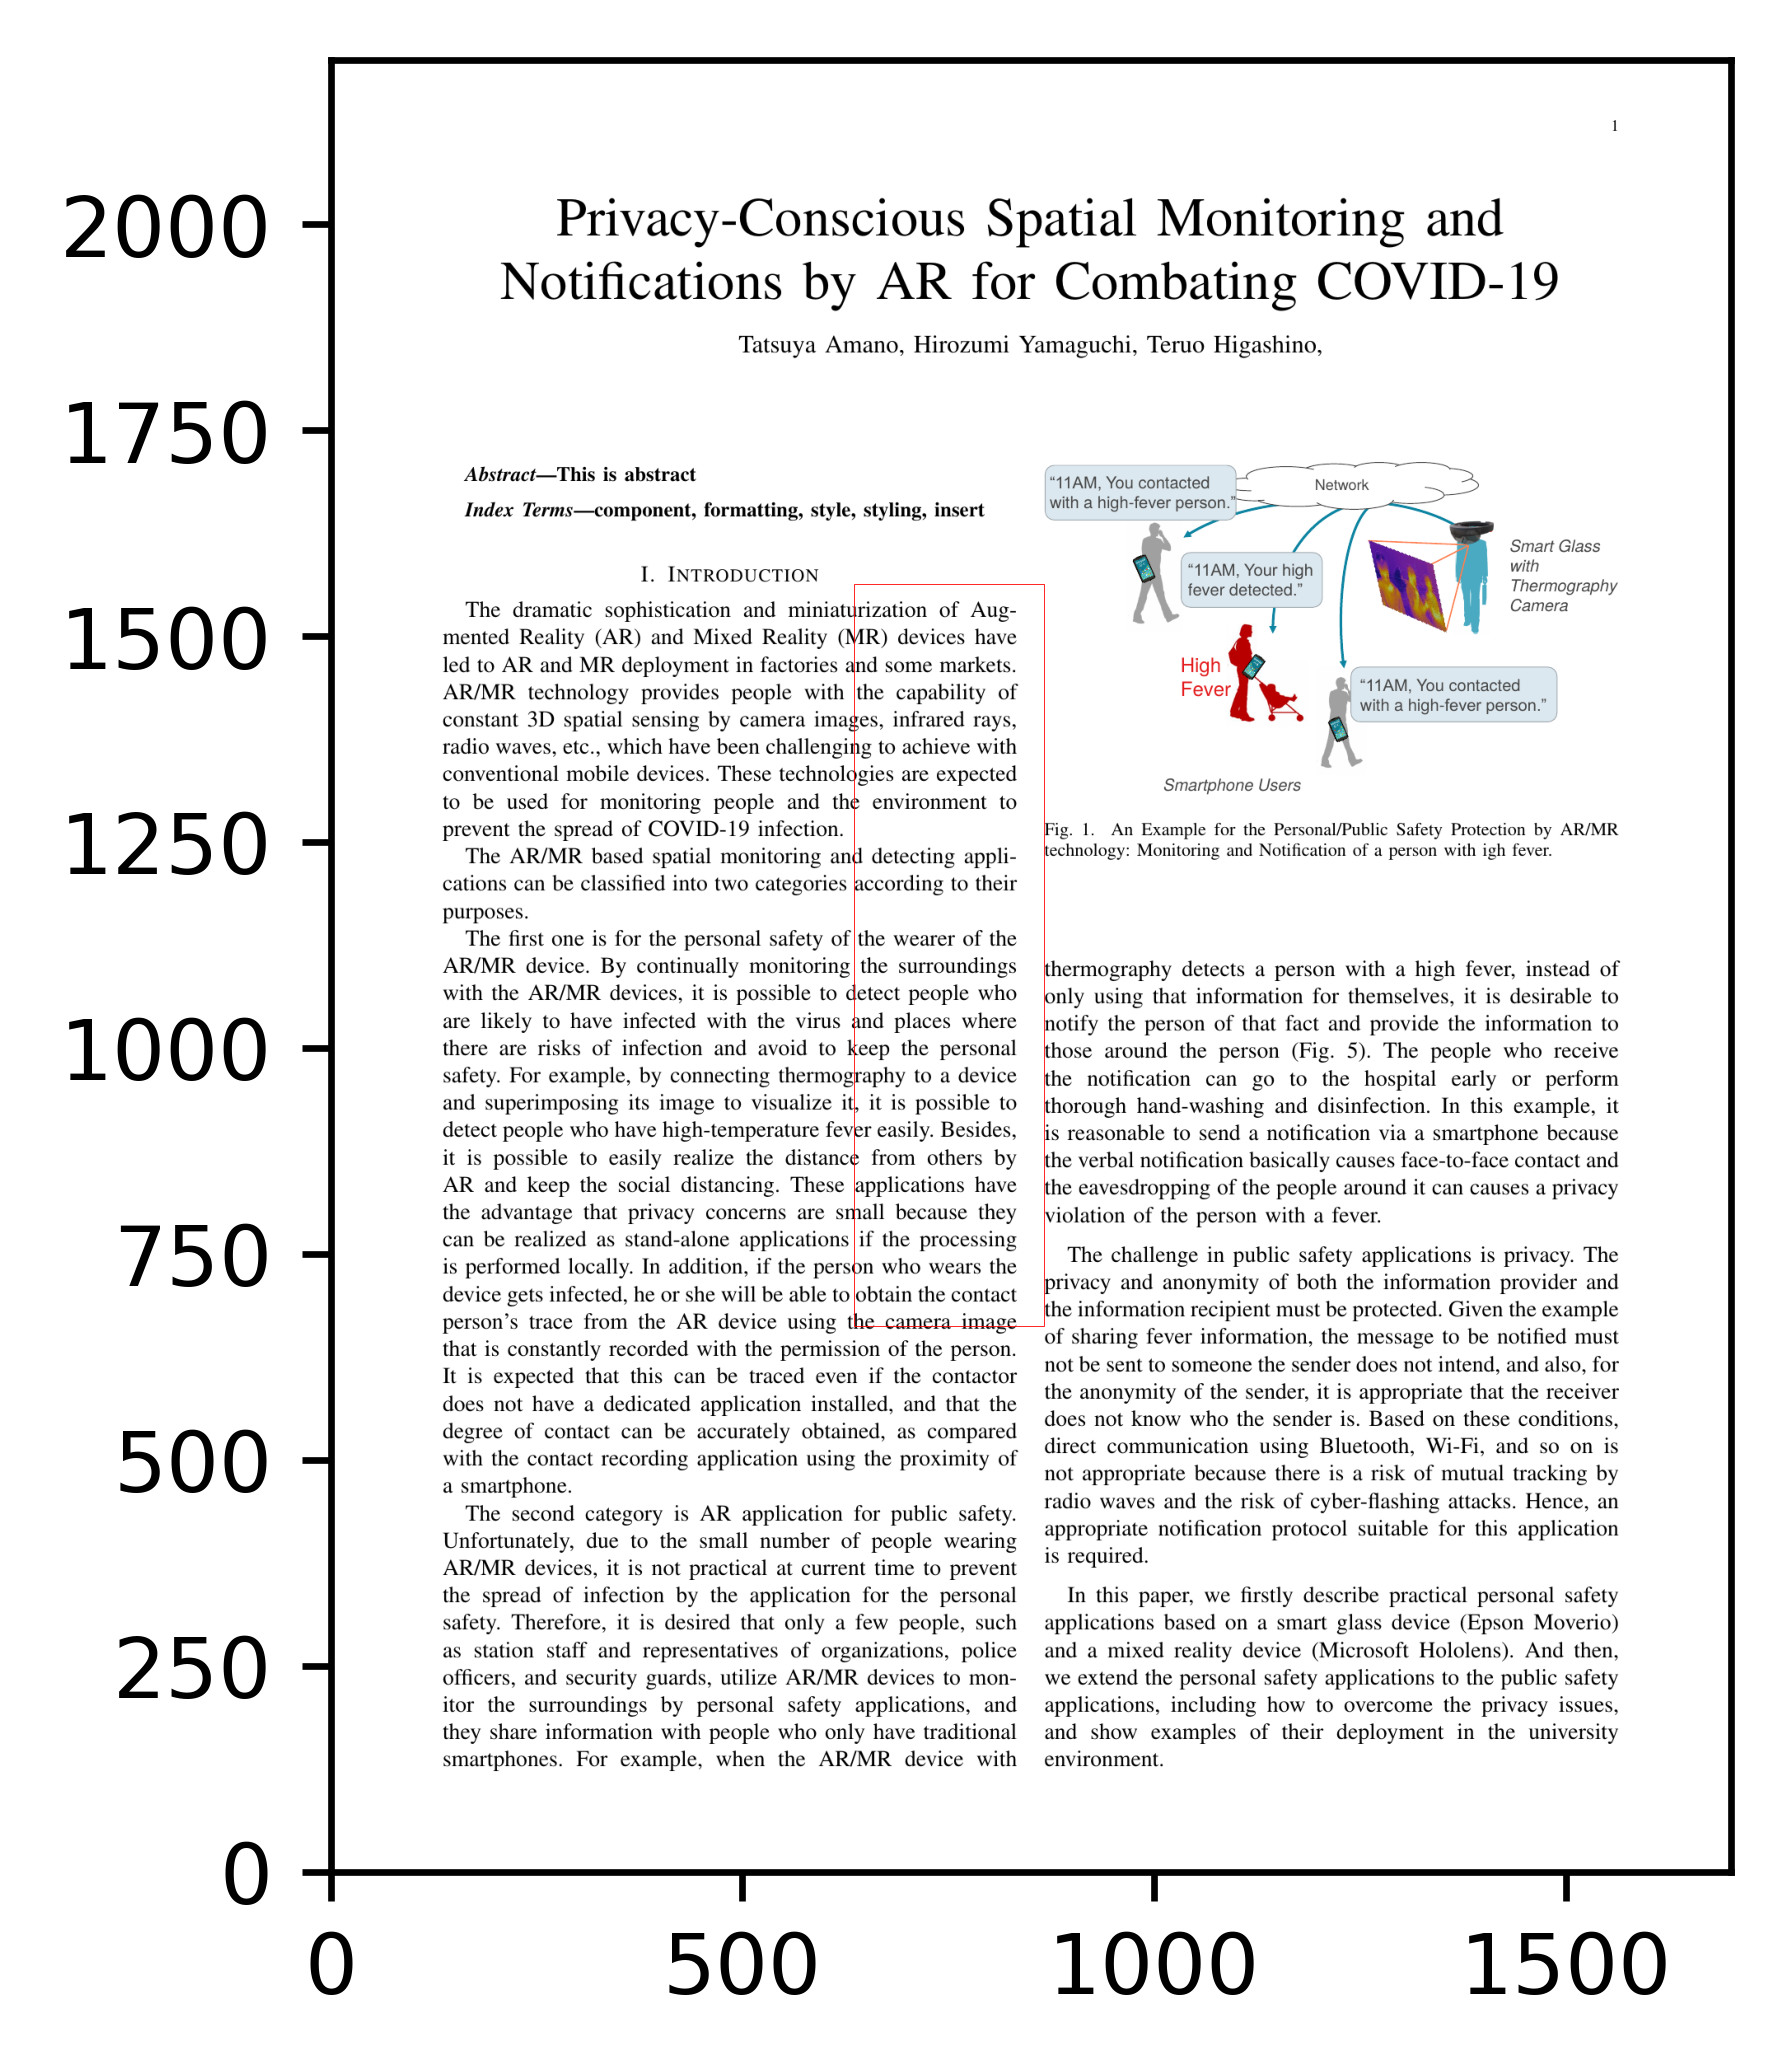

In [33]:
page_no = 0
plot_page(pages[page_no], pdf_images[page_no])

In [80]:
pages[0]['bbox']

{'x1': 0, 'x2': 612, 'y1': 0, 'y2': 792}

In [ ]:
for count, page in enumerate(pages):
    print("Page {}".format(count+1))
    page_image = pdf_images[count]
    plot_page(page, page_image)
    break

In [ ]:
page

In [ ]:
image_x1 = 80.047
image_x2 = 527.239
image_y1 = 531.945
image_y2 = 735.930

w = image_x2 - image_x1
h = image_y2 - image_y1

In [29]:
def plot_virtual_page(page):
    pdf_w = page['bbox']['x2']- page['bbox']['x1']
    pdf_h = page['bbox']['y2']- page['bbox']['y1']
    
    # Plot Page
    fig = plt.figure()
    ax = plt.axes()
    
    for content in page['contents']:
        bbox = content['bbox']
        content_w = (bbox['x2'] - bbox['x1'])
        content_h = (bbox['y2'] - bbox['y1'])
        
        if content['type'] == 'image':
            print(bbox)
            r = patches.Rectangle(xy=(bbox['x1'], bbox['y1']), width=content_w,height=content_h, ec='#FF0000', fill=False,  linestyle='solid', linewidth = 0.2)
            ax.add_patch(r)
        elif content['type'] == 'text':
            r = patches.Rectangle(xy=(bbox['x1'], bbox['y1']), width=content_w,height=content_h, ec='#000000', fill=False, linestyle='dashed',linewidth = 0.1)
            ax.add_patch(r)


    ax.set_xlim(0,pdf_w)
    ax.set_ylim(0,pdf_h)

    ax.set_aspect('equal')
    
    # plt.imshow(np.flipud(page_image))
    # plt.gca().invert_yaxis()

    plt.show()

{'x1': 311.978, 'x2': 471.01, 'y1': 563.03912, 'y2': 616.3801599999999}
{'x1': 149.29328, 'x2': 456.58119999999997, 'y1': 771.6651391999999, 'y2': 651.3699999999999}
{'x1': 348.5838656, 'x2': 542.4181312, 'y1': 372.13166720000004, 'y2': 594.5349567999999}
{'x1': 431.0444576, 'x2': 479.955856, 'y1': 452.1682208, 'y2': 526.705168}
{'x1': 350.22261655999995, 'x2': 563.1883888, 'y1': 360.64742455999993, 'y2': 576.335514568}
{'x1': 491.6454176, 'x2': 541.2926848, 'y1': 506.4926528, 'y2': 590.6824671999999}
{'x1': 391.95683840000004, 'x2': 500.90647359999997, 'y1': 427.14868160000003, 'y2': 545.6213247999999}
{'x1': 398.04146335999997, 'x2': 520.78936, 'y1': 408.84827384, 'y2': 532.769087632}
{'x1': 435.61153351999997, 'x2': 493.61632239999994, 'y1': 444.957428, 'y2': 505.4026319679999}
{'x1': 484.20015680000006, 'x2': 571.0953711999999, 'y1': 514.3924208000001, 'y2': 601.2876352}
{'x1': 453.37050056000004, 'x2': 536.7620416, 'y1': 488.30478968000006, 'y2': 588.1570664799999}


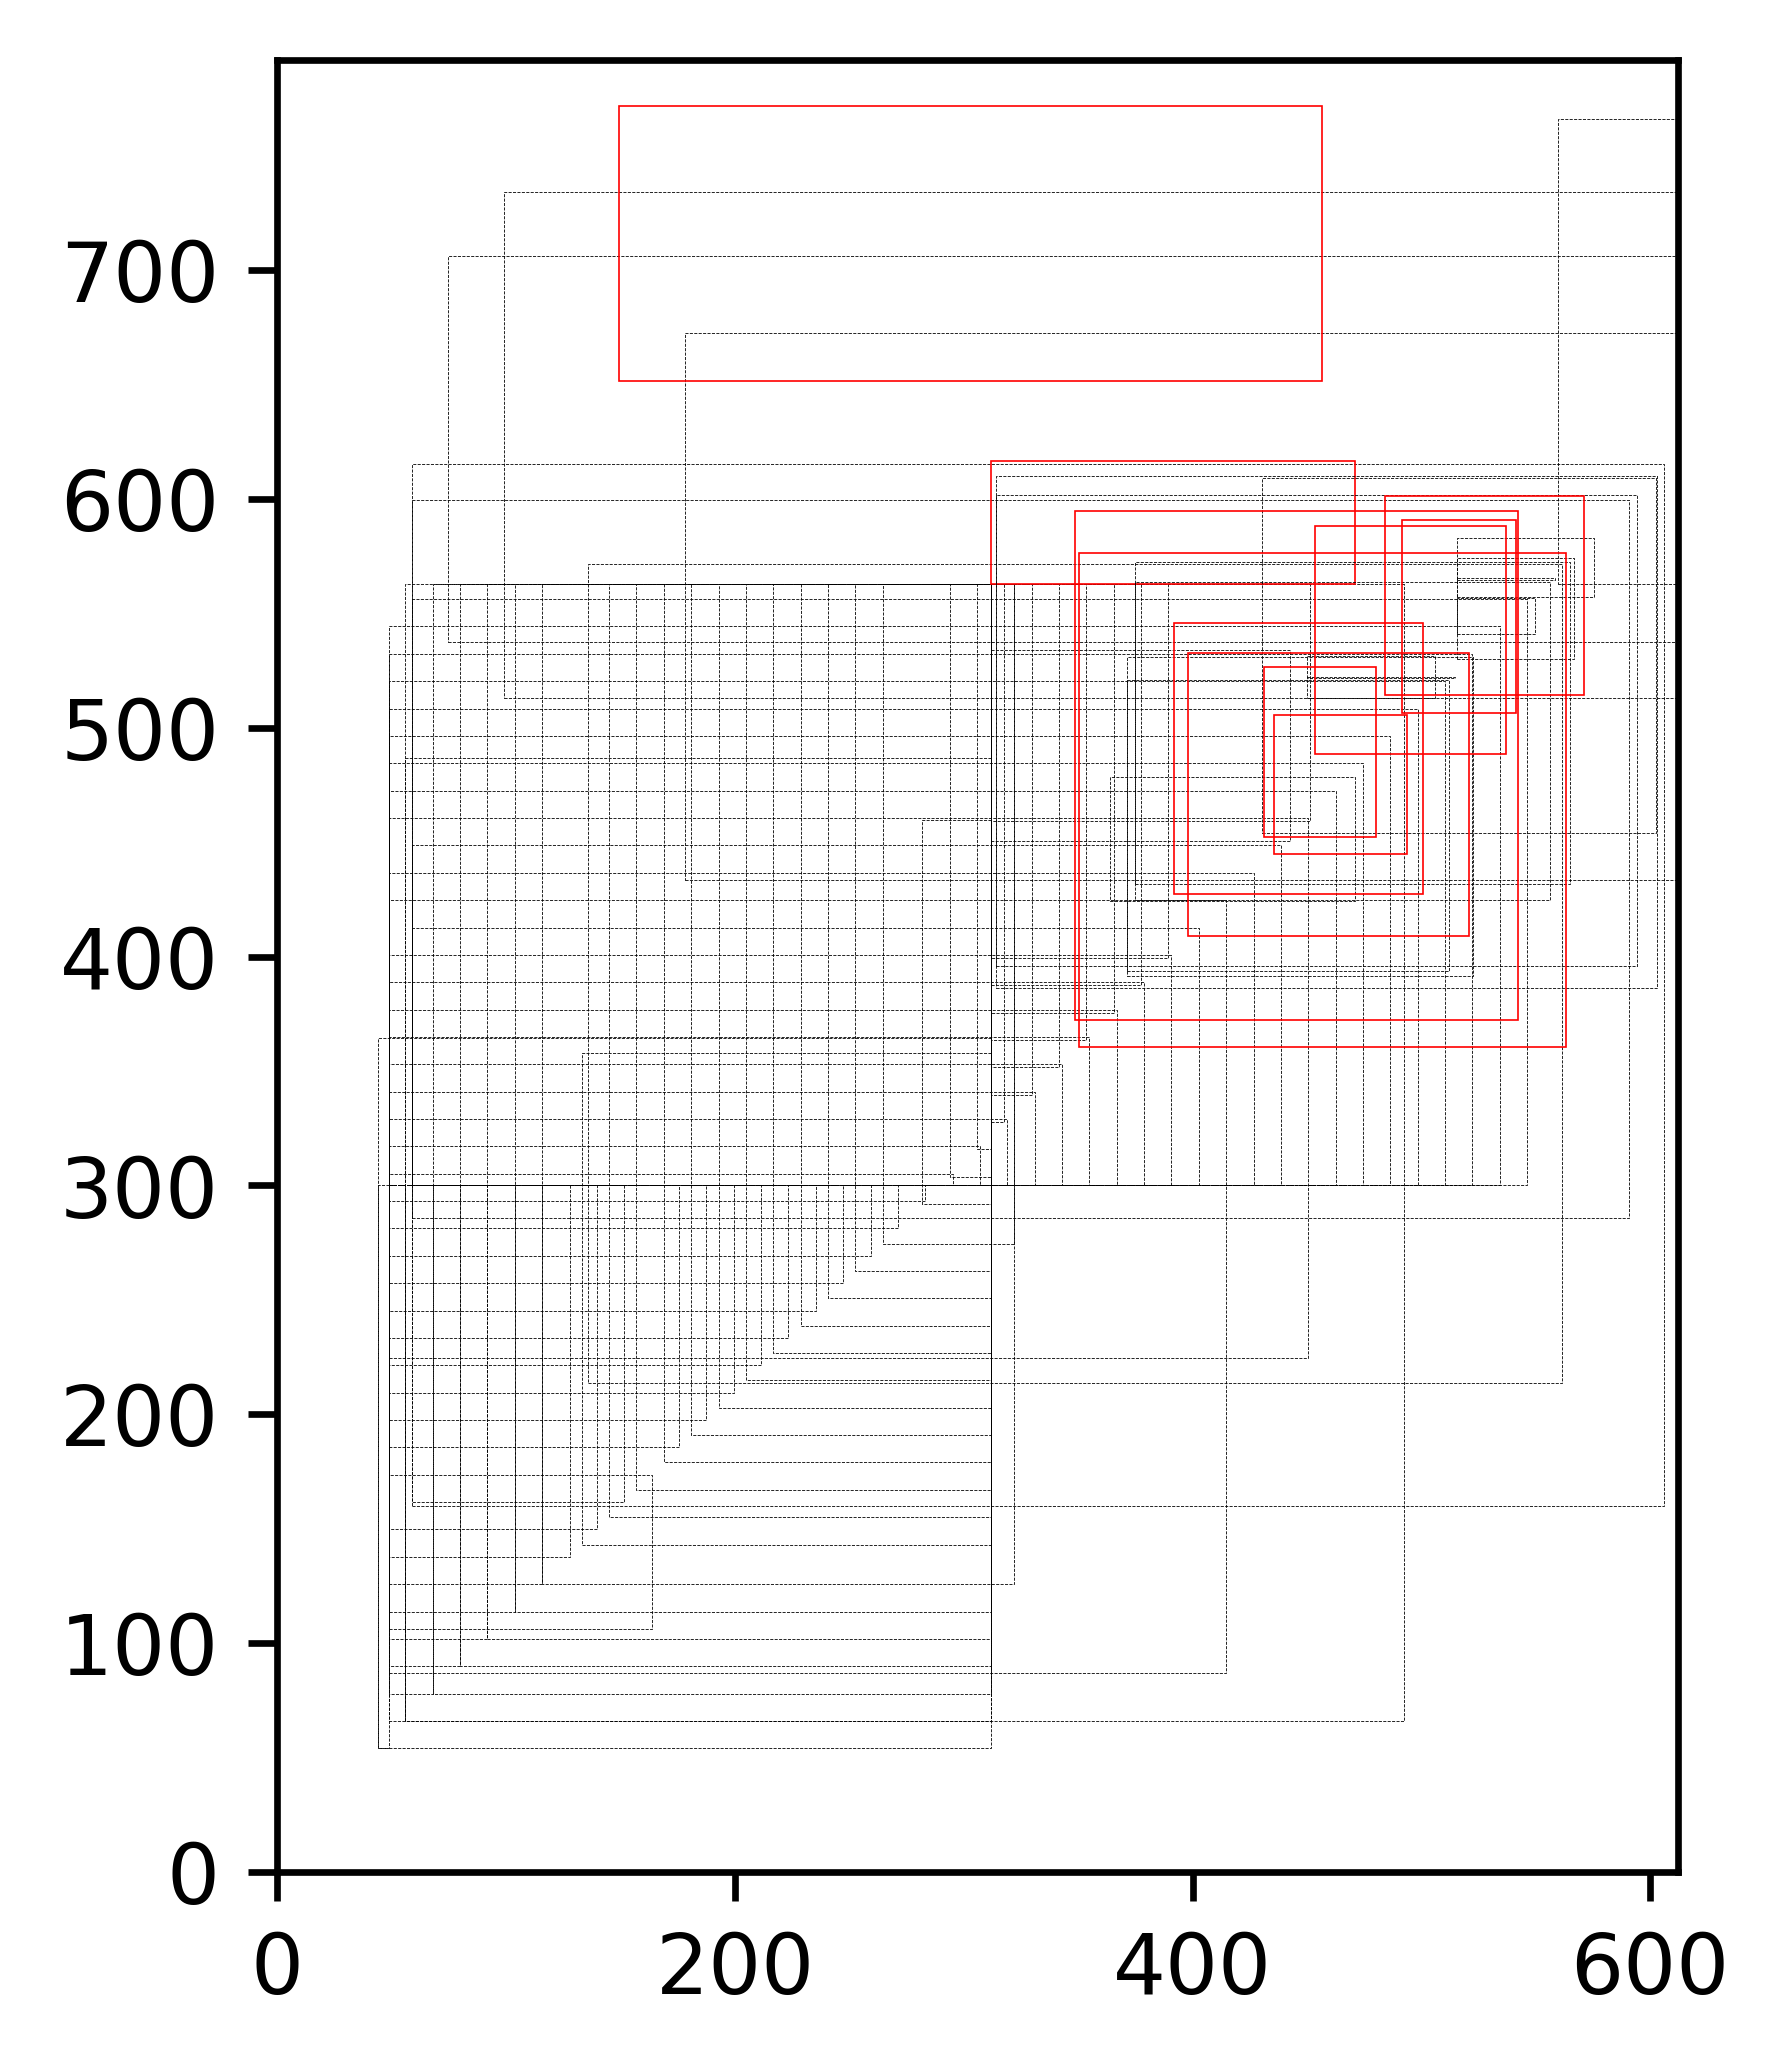

In [79]:
plot_virtual_page(pages[0])